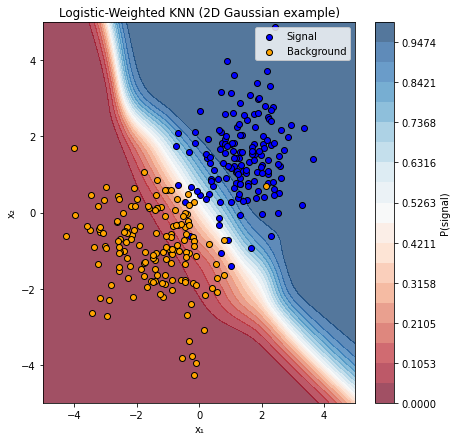

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(1)

# --- 1. Generate 2D Gaussian signal and background ---
mean_s = [1.5, 1.5]
cov_s = [[1.0, 0.2], [0.2, 1.0]]
signal = np.random.multivariate_normal(mean_s, cov_s, 150)

mean_b = [-1.5, -1.0]
cov_b = [[1.2, -0.3], [-0.3, 1.0]]
background = np.random.multivariate_normal(mean_b, cov_b, 150)

X_train = np.vstack([signal, background])
y_train = np.hstack([np.ones(len(signal)), np.zeros(len(background))])

# --- 2. Logistic weighting function ---
def logistic_weight(d, alpha=5.0, d0=1.5):
    """Smoothly decays with distance."""
    return 1 / (1 + np.exp(alpha * (d - d0)))

# --- 3. Weighted Logistic-KNN prediction ---
def predict_logistic_weighted_knn(X_train, y_train, X_query, alpha=5.0, d0=1.5):
    y_pred = []
    for x in X_query:
        d = np.linalg.norm(X_train - x, axis=1)
        w = logistic_weight(d, alpha, d0)
        # weighted probability of signal
        p_signal = np.sum(w * y_train) / np.sum(w)
        y_pred.append(p_signal)
    return np.array(y_pred)

# --- 4. Grid for decision visualization ---
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
p_pred = predict_logistic_weighted_knn(X_train, y_train, grid, alpha=5, d0=1.5)

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, p_pred.reshape(xx.shape), levels=np.linspace(0,1,20), cmap='RdBu', alpha=0.7)
plt.colorbar(label="P(signal)")
plt.scatter(signal[:,0], signal[:,1], label='Signal', color='blue', edgecolor='k')
plt.scatter(background[:,0], background[:,1], label='Background', color='orange', edgecolor='k')
plt.legend()
plt.title("Logistic-Weighted KNN (2D Gaussian example)")
plt.xlabel("x₁"); plt.ylabel("x₂")
plt.show()


In [2]:
%matplotlib qt

ImportError: Failed to import any qt binding

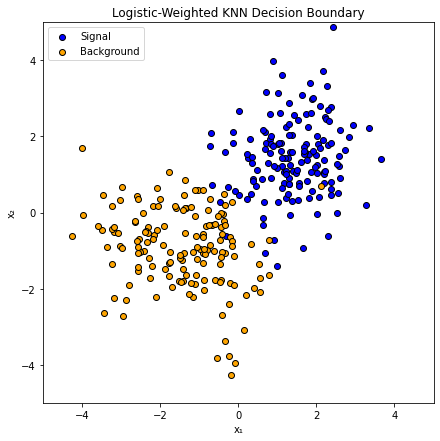

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

np.random.seed(1)

# --- 1. Generate 2D Gaussian signal and background ---
mean_s = [1.5, 1.5]
cov_s = [[1.0, 0.2], [0.2, 1.0]]
signal = np.random.multivariate_normal(mean_s, cov_s, 150)

mean_b = [-1.5, -1.0]
cov_b = [[1.2, -0.3], [-0.3, 1.0]]
background = np.random.multivariate_normal(mean_b, cov_b, 150)

X_train = np.vstack([signal, background])
y_train = np.hstack([np.ones(len(signal)), np.zeros(len(background))])

# --- 2. Logistic weighting function ---
def logistic_weight(d, alpha=5.0, d0=1.5):
    return 1 / (1 + np.exp(alpha * (d - d0)))

# --- 3. Weighted prediction ---
def predict_logistic_weighted_knn(X_train, y_train, X_query, alpha=5.0, d0=1.5):
    y_pred = []
    for x in X_query:
        d = np.linalg.norm(X_train - x, axis=1)
        w = logistic_weight(d, alpha, d0)
        p_signal = np.sum(w * y_train) / np.sum(w)
        y_pred.append(p_signal)
    return np.array(y_pred)

# --- 4. Create grid for visualization ---
xx, yy = np.meshgrid(np.linspace(-5, 5, 150), np.linspace(-5, 5, 150))
grid = np.c_[xx.ravel(), yy.ravel()]

# --- 5. Setup plot ---
fig, ax = plt.subplots(figsize=(7,7))
sc = ax.scatter([], [], s=1, c=[], cmap='RdBu', alpha=0.6)
ax.scatter(signal[:,0], signal[:,1], color='blue', edgecolor='k', label='Signal')
ax.scatter(background[:,0], background[:,1], color='orange', edgecolor='k', label='Background')
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5)
ax.set_xlabel("x₁"); ax.set_ylabel("x₂")
ax.set_title("Logistic-Weighted KNN Decision Boundary")
ax.legend(loc='upper left')
txt = ax.text(-4.8, 4.5, '', fontsize=12, color='k')

# --- 6. Animation update function ---
alphas = np.linspace(0.5, 10, 30)  # slope of logistic function
def update(frame):
    alpha = alphas[frame]
    p_pred = predict_logistic_weighted_knn(X_train, y_train, grid, alpha=alpha, d0=1.5)
    sc.set_offsets(grid)
    sc.set_array(p_pred)
    txt.set_text(f"α = {alpha:.2f}")
    return sc, txt

ani = FuncAnimation(fig, update, frames=len(alphas), interval=300, blit=False, repeat=True)
plt.show()

ani.save("logistic_weighted_knn.mp4", fps=1, dpi=150)

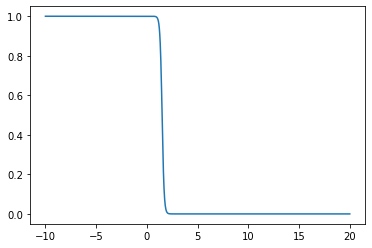

In [11]:
plt.plot( np.linspace(-10, 20 , 2000) , logistic_weight( np.linspace(-10, 20 , 2000) , alpha=10, d0=1.5)  )

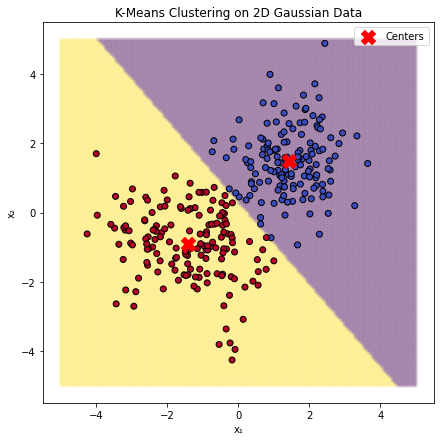

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# 1. Generate Gaussian signal/background (no labels)
mean_s = [1.5, 1.5]
cov_s = [[1.0, 0.2], [0.2, 1.0]]
signal = np.random.multivariate_normal(mean_s, cov_s, 150)

mean_b = [-1.5, -1.0]
cov_b = [[1.2, -0.3], [-0.3, 1.0]]
background = np.random.multivariate_normal(mean_b, cov_b, 150)

X = np.vstack([signal, background])

# 2. Simple K-Means from scratch
def kmeans(X, k=2, steps=20):
    centers = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(steps):
        d = np.linalg.norm(X[:,None,:] - centers[None,:,:], axis=2)
        labels = np.argmin(d, axis=1)
        new_centers = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers, atol=1e-4):
            break
        centers = new_centers
    return centers, labels

centers, labels = kmeans(X, k=2)

# 3. Plot result
xx, yy = np.meshgrid(np.linspace(-5,5,200), np.linspace(-5,5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
d = np.linalg.norm(grid[:,None,:] - centers[None,:,:], axis=2)
grid_labels = np.argmin(d, axis=1)

plt.figure(figsize=(7,7))
plt.scatter(grid[:,0], grid[:,1], c=grid_labels, alpha=0.1, s=10)
plt.scatter(X[:,0], X[:,1], c=labels, edgecolors='k', cmap='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centers')
plt.xlabel("x₁"); plt.ylabel("x₂")
plt.title("K-Means Clustering on 2D Gaussian Data")
plt.legend()
plt.show()
